## Unsupervised Learning: Principal Component Analysis (Iris dataset)
* sklearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

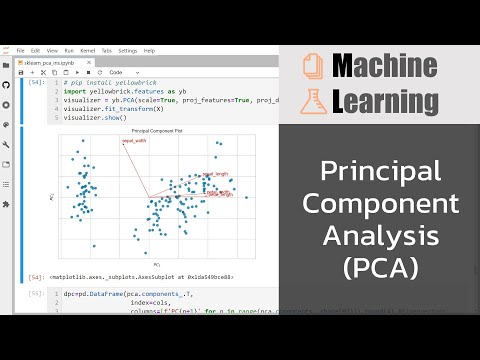

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('z8APHNo1iA4', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [5]:
pd.Timestamp.now()

Timestamp('2022-10-02 14:03:01.664915')

In [6]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
73,6.1,2.8,4.7,1.2,versicolor
4,5.0,3.6,1.4,0.2,setosa
37,4.9,3.1,1.5,0.1,setosa
96,5.7,2.9,4.2,1.3,versicolor
16,5.4,3.9,1.3,0.4,setosa
83,6.0,2.7,5.1,1.6,versicolor
134,6.1,2.6,5.6,1.4,virginica
110,6.5,3.2,5.1,2.0,virginica
79,5.7,2.6,3.5,1.0,versicolor


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

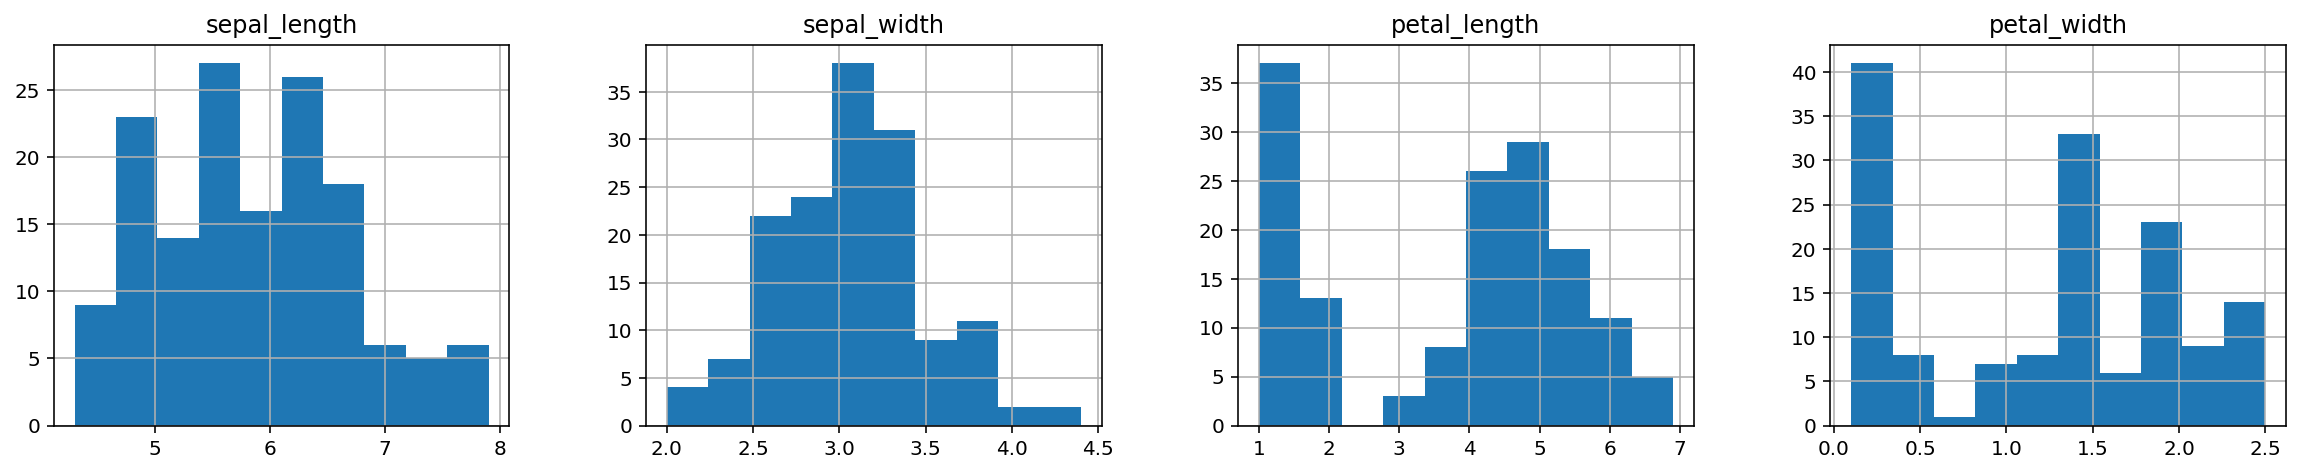

In [10]:
df[cols].hist(layout=(1, len(cols)), figsize=(5 * len(cols), 3.5));

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


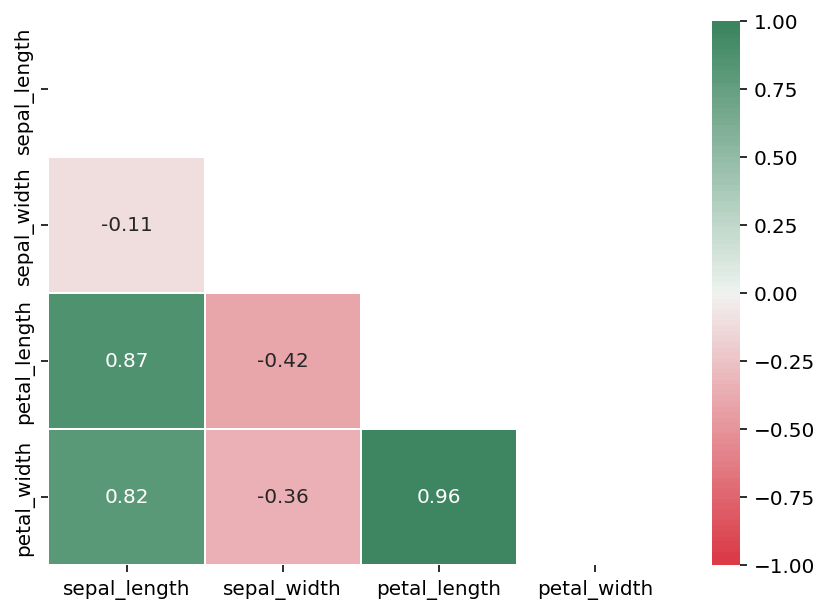

In [12]:
dcorr=df[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

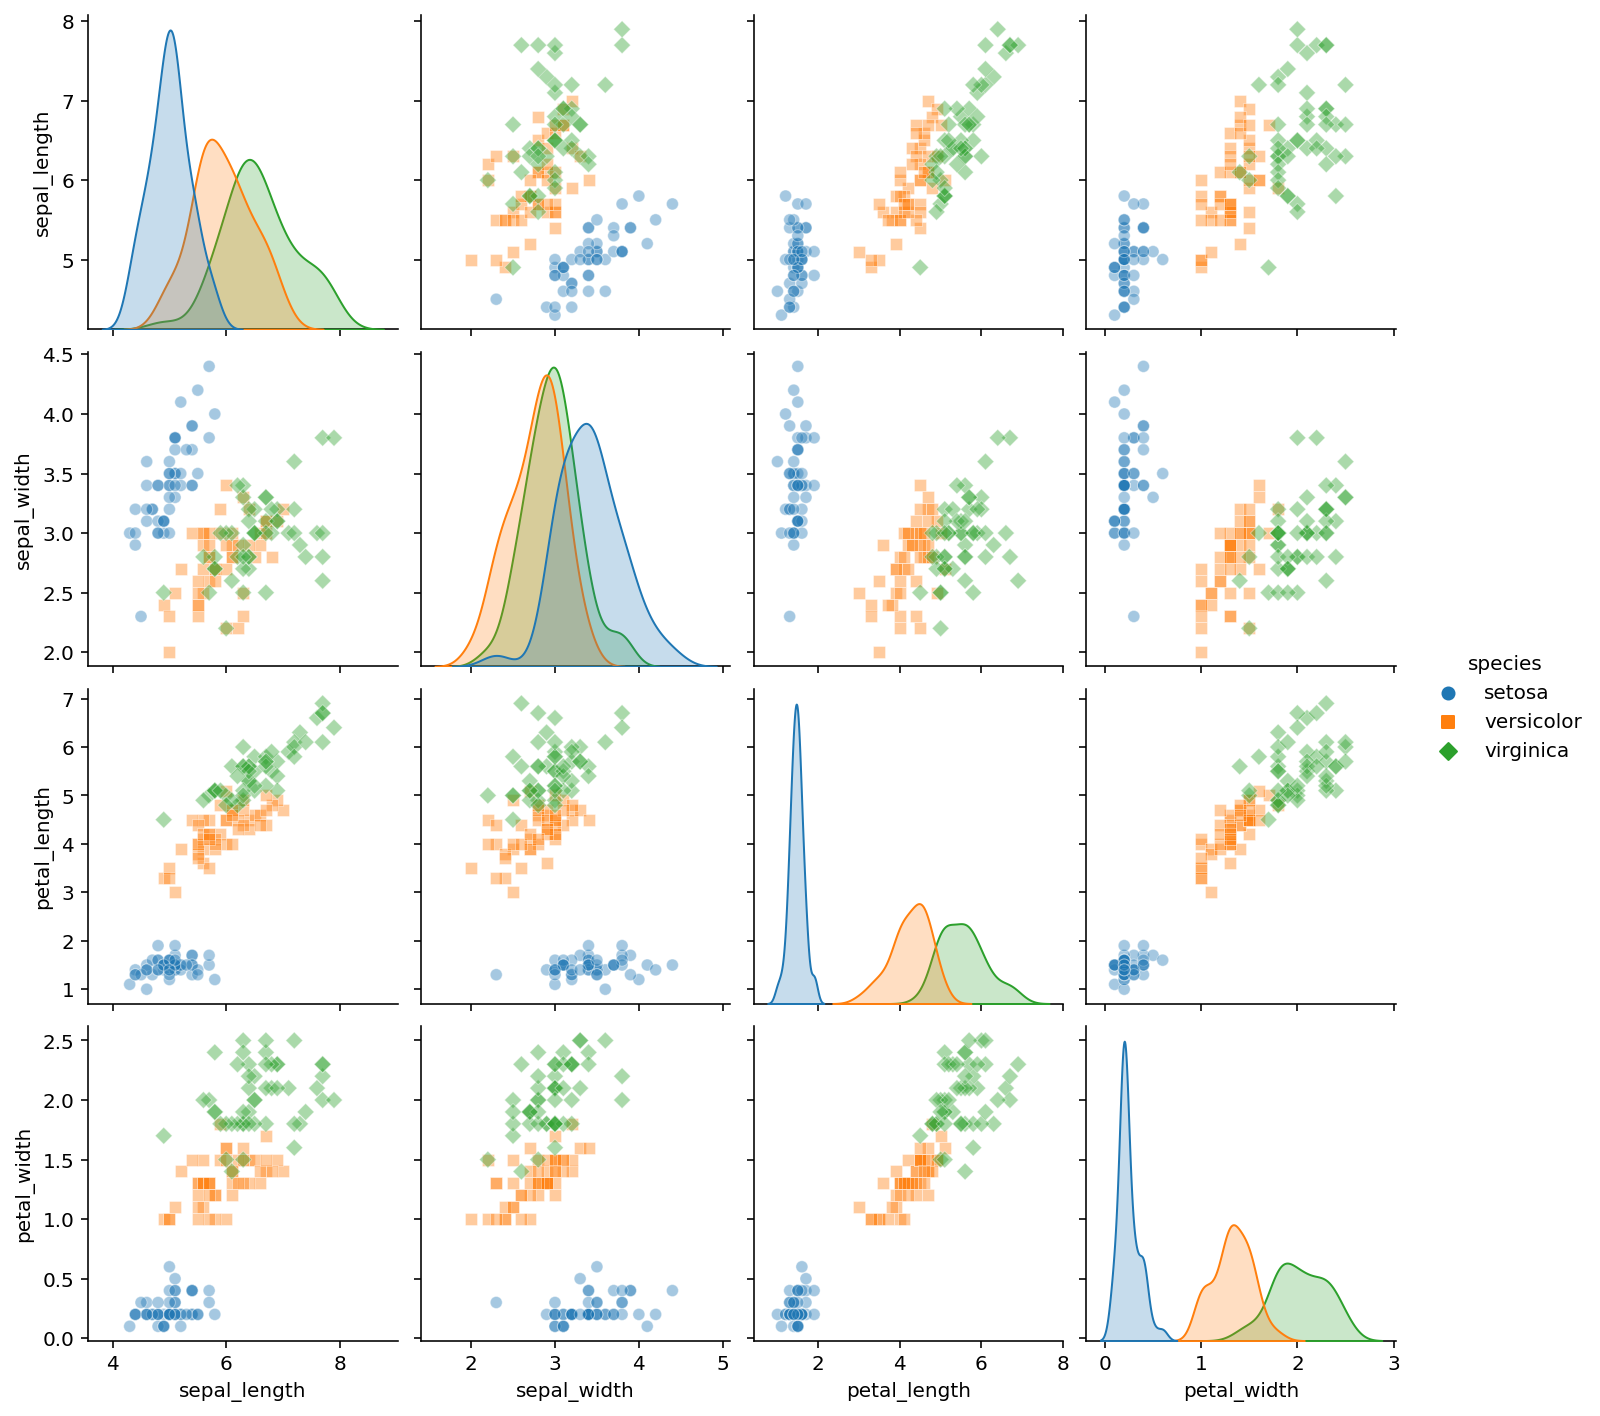

In [13]:
sns.pairplot(df, vars=cols, 
             hue='species', 
             markers=['o', 's', 'D'],
             plot_kws={'alpha': .4});

## PCA

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [15]:
df[cols]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# StandardScaler (z-score)
$z=\frac{x_i-\bar{x}}{sd}$

In [17]:
# เนื่องจาก เป็น unsupervised ตัว y ไม่ต้องมีก็ได้
X=df[cols]
scaler = StandardScaler()
X_t=scaler.fit_transform(X)
# y = df.species

In [23]:
scaler.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [24]:
df[cols].mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [25]:
scaler.var_

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [27]:
np.sqrt(scaler.var_) # sd

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [28]:
X_t[:5].round(4)

array([[-0.9007,  1.0321, -1.3413, -1.313 ],
       [-1.143 , -0.125 , -1.3413, -1.313 ],
       [-1.3854,  0.3378, -1.3981, -1.313 ],
       [-1.5065,  0.1064, -1.2844, -1.313 ],
       [-1.0218,  1.2635, -1.3413, -1.313 ]])

In [29]:
dz=pd.DataFrame(X_t.round(4), columns=[f'z_{c}' for c in cols])
dz

,z_sepal_length,z_sepal_width,z_petal_length,z_petal_width
0,-0.9007,1.0321,-1.3413,-1.3130
1,-1.1430,-0.1250,-1.3413,-1.3130
2,-1.3854,0.3378,-1.3981,-1.3130
3,-1.5065,0.1064,-1.2844,-1.3130
4,-1.0218,1.2635,-1.3413,-1.3130
...,...,...,...,...
145,1.0380,-0.1250,0.8196,1.4480
146,0.5533,-1.2820,0.7059,0.9221
147,0.7957,-0.1250,0.8196,1.0535
148,0.4322,0.8007,0.9334,1.4480


In [30]:
pd.concat([df, dz], axis='columns')

,sepal_length,sepal_width,petal_length,petal_width,species,z_sepal_length,z_sepal_width,z_petal_length,z_petal_width
0,5.1,3.5,1.4,0.2,setosa,-0.9007,1.0321,-1.3413,-1.3130
1,4.9,3.0,1.4,0.2,setosa,-1.1430,-0.1250,-1.3413,-1.3130
2,4.7,3.2,1.3,0.2,setosa,-1.3854,0.3378,-1.3981,-1.3130
3,4.6,3.1,1.5,0.2,setosa,-1.5065,0.1064,-1.2844,-1.3130
4,5.0,3.6,1.4,0.2,setosa,-1.0218,1.2635,-1.3413,-1.3130
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.0380,-0.1250,0.8196,1.4480
146,6.3,2.5,5.0,1.9,virginica,0.5533,-1.2820,0.7059,0.9221
147,6.5,3.0,5.2,2.0,virginica,0.7957,-0.1250,0.8196,1.0535
148,6.2,3.4,5.4,2.3,virginica,0.4322,0.8007,0.9334,1.4480


In [33]:
# วิธีคืดค่า z_sepal_length
(df['sepal_length']-scaler.mean_[0])/np.sqrt(scaler.var_[0]) 

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal_length, Length: 150, dtype: float64

In [34]:
X_t[:, 0]

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

In [35]:
X_t[:, 0].mean().round(4)

-0.0

In [36]:
np.sqrt(X_t[:, 0].var())

1.0

In [37]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
X_t[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [39]:
X_t.shape

(150, 4)

In [40]:
X_t.shape[1]

4

In [41]:
pca = PCA(n_components=X_t.shape[1])
# pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=4) = [2.93035378 0.92740362 0.14834223 0.02074601]
explained_variance_ratio (n_components=4) = [0.72770452 0.23030523 0.03683832 0.00515193]
sum explained_variance_ratio = 1.0000000000000002


In [42]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

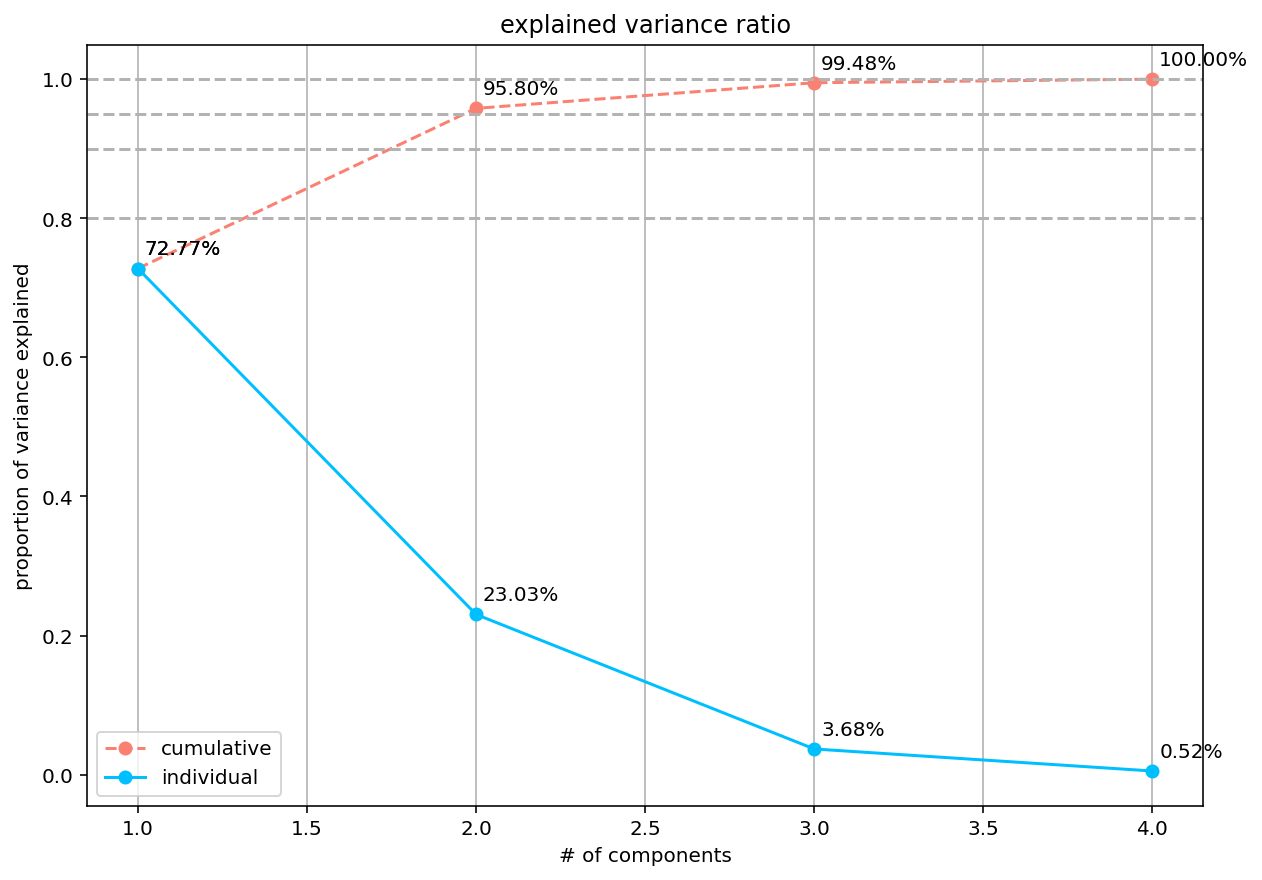

In [43]:
scree_plot(X, 4, True, True)

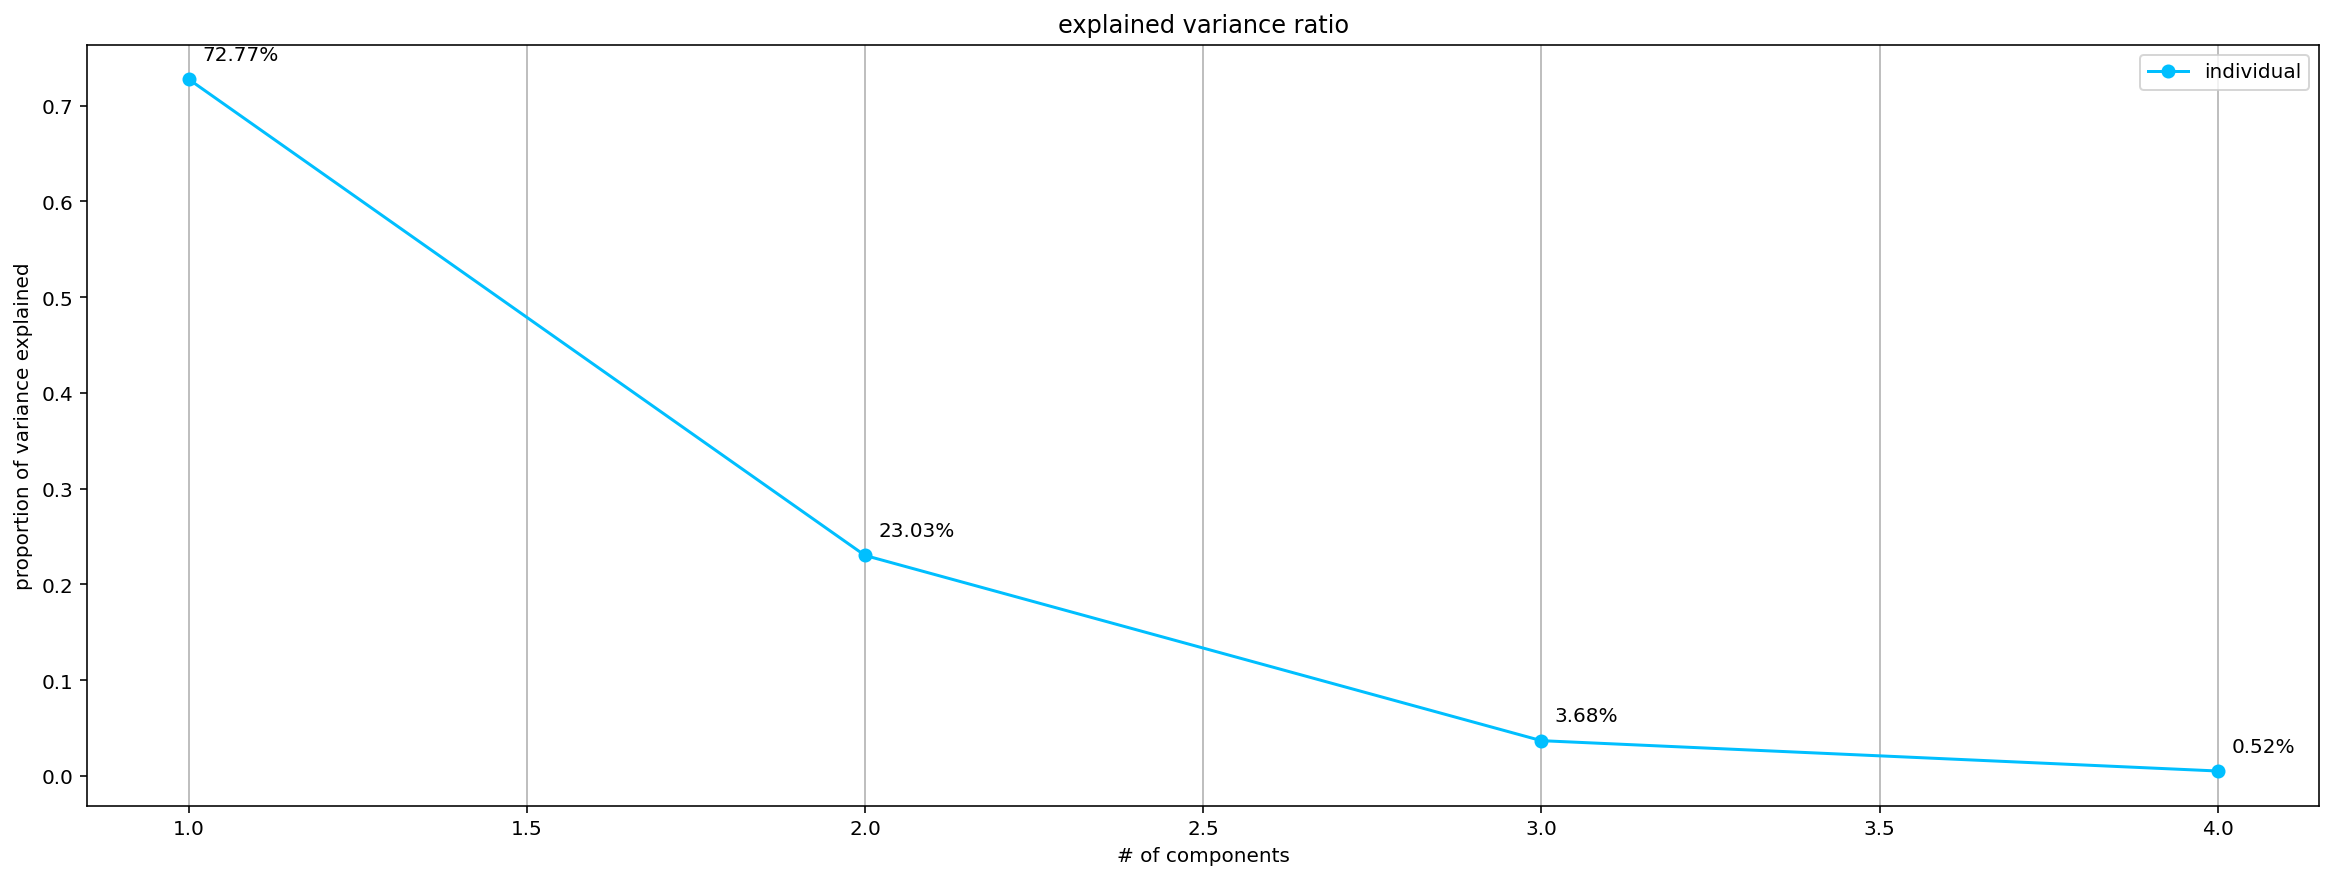

In [44]:
scree_plot(X, 4, False, True, (20, 7))

In [45]:
pca.components_ # Eigenvectors

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [47]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
# highlight ตัวที่มีค่ามากกว่า 0.5
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4
sepal_length,0.522400,0.372300,-0.721000,-0.262000
sepal_width,-0.263400,0.925600,0.242000,0.124100
petal_length,0.581300,0.021100,0.140900,0.801200
petal_width,0.565600,0.065400,0.633800,-0.523500


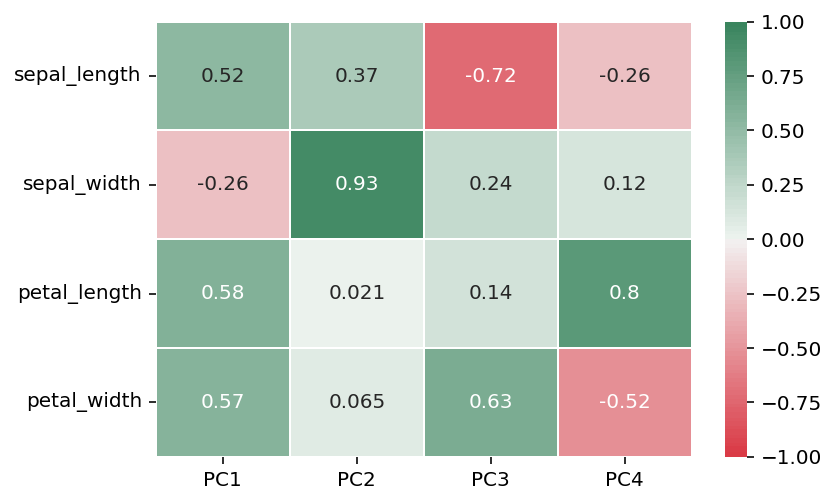

In [48]:
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1, 
            center=0, annot=True, vmin=-1, vmax=1);

In [49]:
X_t[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [50]:
X_t.shape

(150, 4)

In [51]:
pca.components_.T.shape

(4, 4)

In [52]:
# multiply matrix
np.dot(X_t, pca.components_.T)[:5] # equals pca.transform(X_t)

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729]])

In [53]:
pca.transform(X_t)[:5]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729]])

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
X_t[:1]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673]])

In [56]:
pca.components_[:1]

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105]])

In [57]:
np.sum(X_t[:1] * pca.components_[:1])

-2.2645417283949003

In [58]:
pca.n_components_

4

In [59]:
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              df[['species']]], axis = 'columns')
dd.head()

,PC1,PC2,PC3,PC4,species
0,-2.264542,0.505704,-0.121943,-0.023073,setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,setosa
2,-2.367950,-0.318477,0.051480,-0.027825,setosa
3,-2.304197,-0.575368,0.098860,0.066311,setosa
4,-2.388777,0.674767,0.021428,0.037397,setosa


### Plot PC1 and PC2

In [61]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [2.93035378 0.92740362]
explained_variance_ratio (n_components=2) = [0.72770452 0.23030523]
sum explained_variance_ratio = 0.9580097536148199


In [62]:
X_pca.shape

(150, 2)

In [63]:
X_pca[:5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

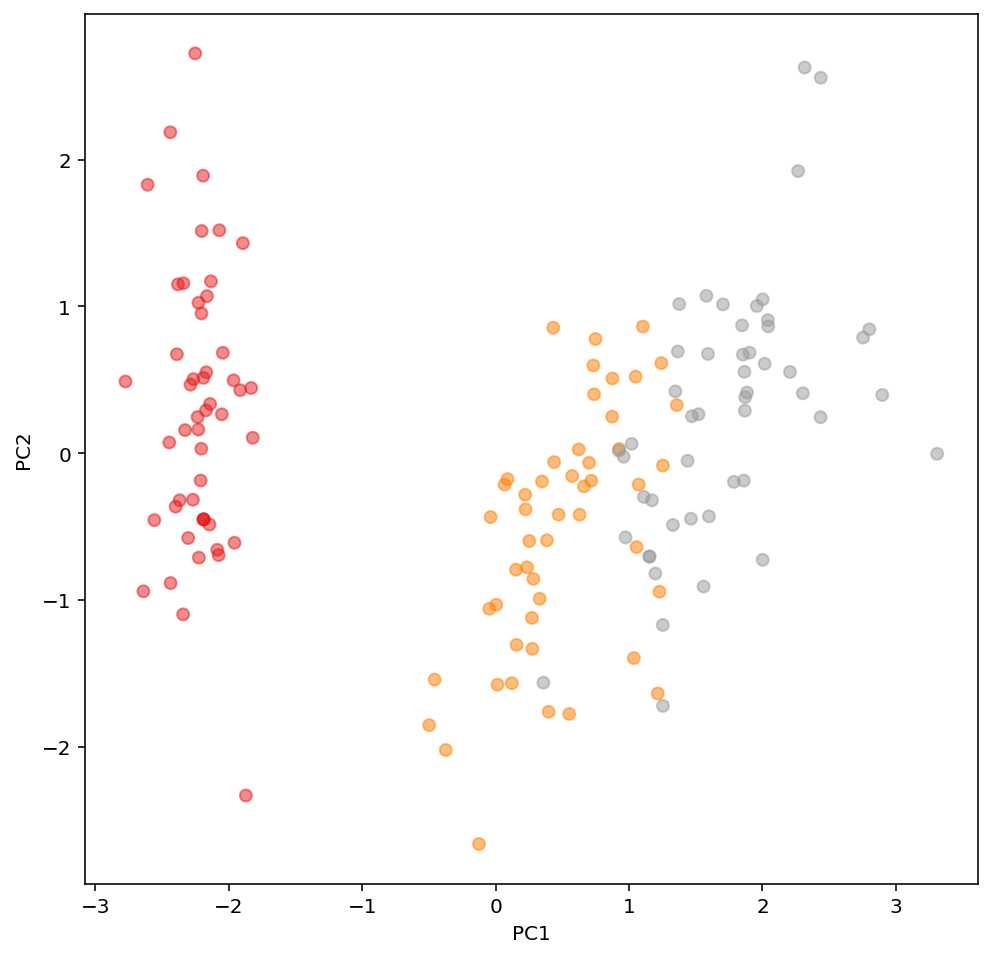

In [64]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

## biplot using yellowbrick package

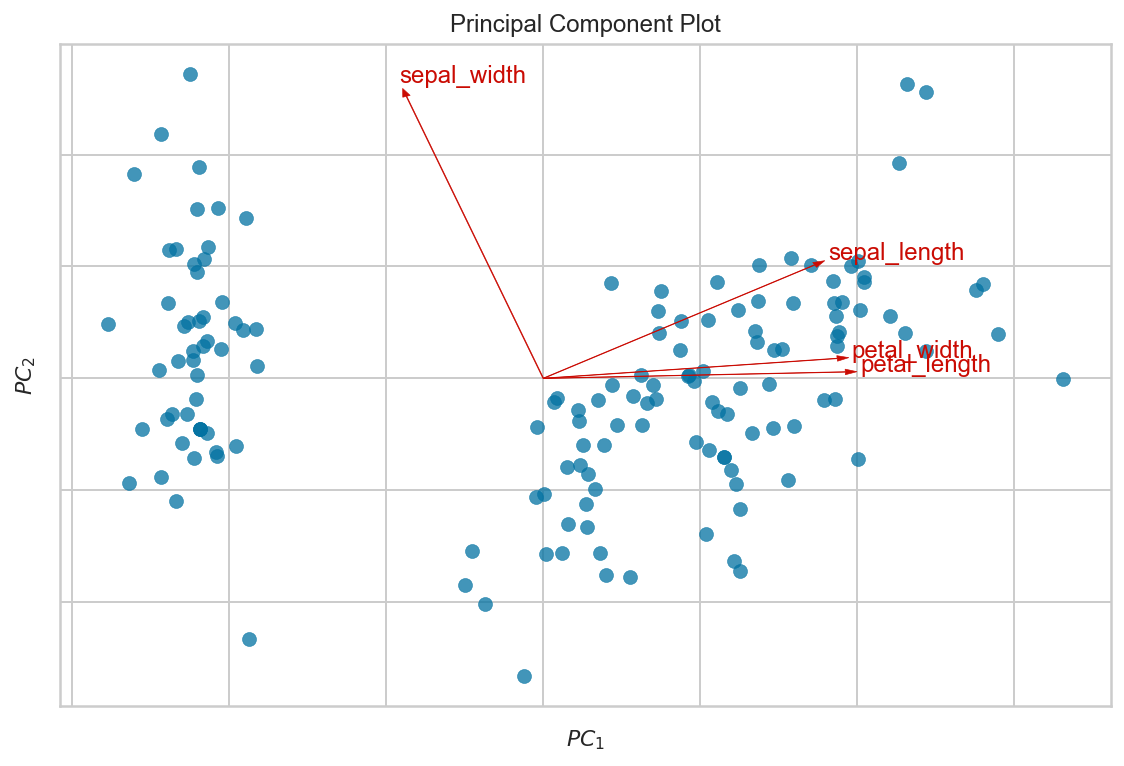

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [65]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [66]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2
sepal_length,0.522400,0.372300
sepal_width,-0.263400,0.925600
petal_length,0.581300,0.021100
petal_width,0.565600,0.065400


In [67]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Plot 3D (PC1, PC2, PC3)

In [68]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [69]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [2.93035378 0.92740362 0.14834223]
explained_variance_ratio (n_components=3) = [0.72770452 0.23030523 0.03683832]
sum explained_variance_ratio = 0.9948480731910938


In [70]:
X_pca[:5]

array([[-2.26454173,  0.5057039 , -0.12194335],
       [-2.0864255 , -0.65540473, -0.22725083],
       [-2.36795045, -0.31847731,  0.05147962],
       [-2.30419716, -0.57536771,  0.09886044],
       [-2.38877749,  0.6747674 ,  0.02142785]])

In [71]:
# switch to interactive matplotlib
%matplotlib qt
%pylab qt

Populating the interactive namespace from numpy and matplotlib


In [62]:
# switch back to inline mode
%matplotlib inline

In [72]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

---